In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data
from pylab import rcParams
#rcParams['figure.figsize'] = 10, 7df = pd.read_csv('/Users/.../.../.../Electric_consumption.csv')

In [ ]:
#Importing dataset
data = pd.read_csv('data.csv')
data.head()

,Date,Surfline,Blu,Broadband Home,MTN,VODAFONE,TELSOL,TOTAL
0,2016-Jan,65178,1460,26743,NaN,NaN,NaN,93381
1,2016-Feb,72881,1433,26666,NaN,NaN,NaN,100980
2,2016-Mar,73789,1396,26666,NaN,NaN,NaN,101851
3,2016-Apr,65378,1343,26630,NaN,NaN,NaN,93351
4,2016-May,65757,1299,26585,NaN,NaN,NaN,93641


In [ ]:
#Subsetting Date and TOTAL Columns
dataset=data[["Date","TOTAL"]]
dataset=dataset.dropna()
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', inplace=True) #set date as index
dataset.head()

,TOTAL
Date,
2016-01-01,93381
2016-02-01,100980
2016-03-01,101851
2016-04-01,93351
2016-05-01,93641


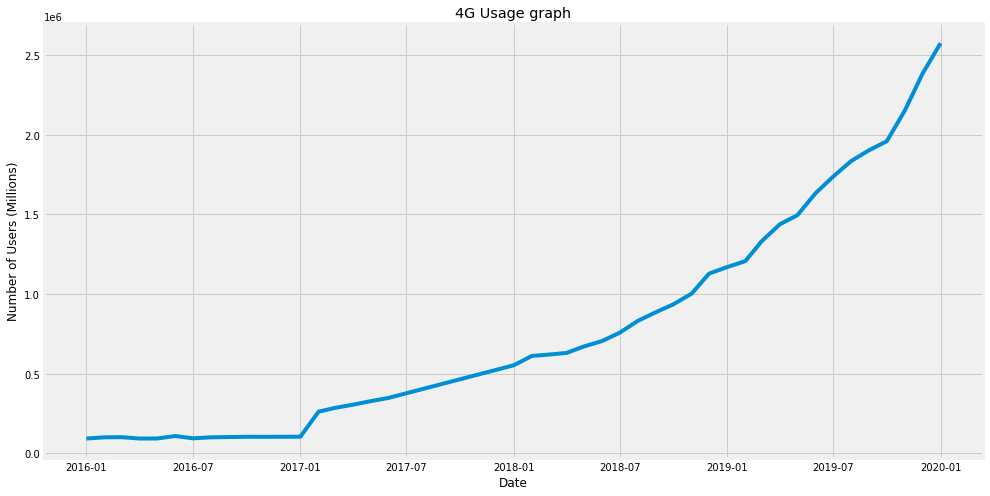

In [ ]:
#Visualizing Trend of Total Users
fig= plt.figure(figsize=(15,8))
plt.xlabel("Date")
plt.ylabel("Number of Users (Millions)")
plt.title("4G Usage graph")
plt.plot(dataset)

<Figure size 1080x720 with 0 Axes>

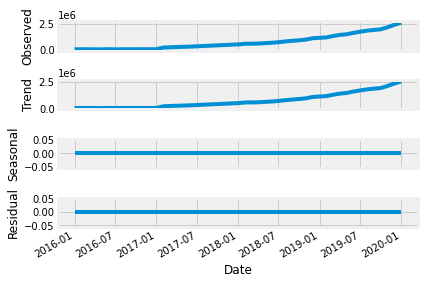

In [ ]:
#Checking Observed,Trend, Seasonality and Residal
from statsmodels.tsa.seasonal import seasonal_decompose
fig= plt.figure(figsize=(15,10))
result = seasonal_decompose(dataset, model='additive',freq=1)
result.plot()
plt.show()

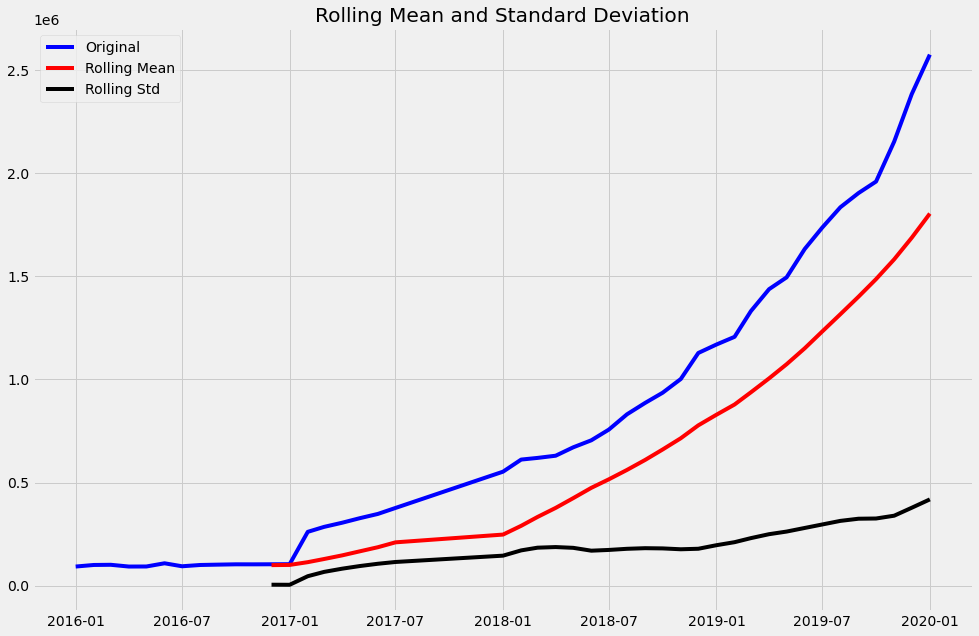

Results of dickey fuller test
Test Statistics                 6.559768
p-value                         1.000000
No. of lags used                0.000000
Number of observations used    43.000000
critical value (1%)            -3.592504
critical value (5%)            -2.931550
critical value (10%)           -2.604066
dtype: float64


In [ ]:
#Plotting and checking for Stationarity in Timeseries data
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    fig= plt.figure(figsize=(15,10))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['TOTAL'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(dataset)

<Figure size 1080x576 with 0 Axes>

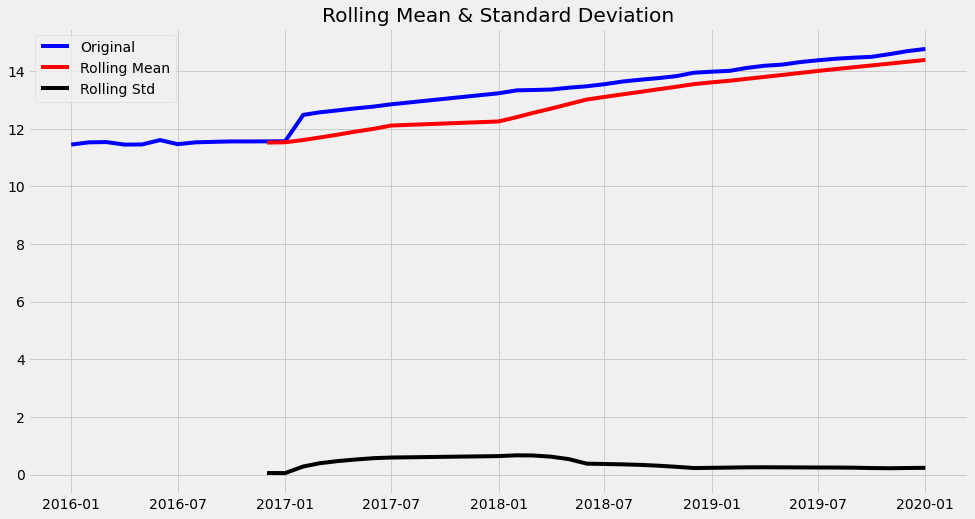

In [ ]:
#Log transform of the Data series
fig= plt.figure(figsize=(15,8))
dataset_log = np.log(dataset)
#Visualizing rolling mean and sd
def stationarity_test(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
  
fig= plt.figure(figsize=(15,8))
stationarity_test(dataset_log)

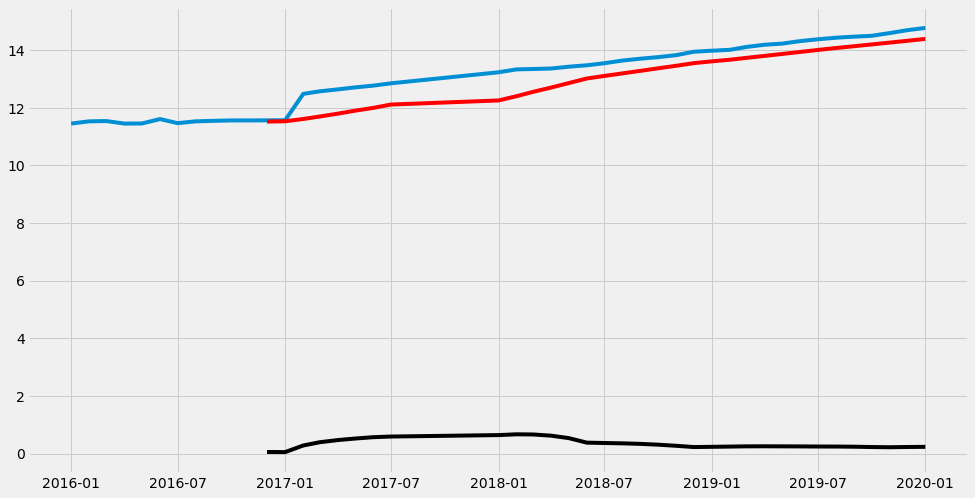

In [ ]:
df=dataset
fig= plt.figure(figsize=(15,8))
dataset_log = np.log(dataset)
moving_avg = dataset_log.rolling(12).mean()
std_dev = dataset_log.rolling(12).std()
plt.plot(dataset_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()

In [ ]:
dataset_log_moving_avg_diff = dataset_log-moving_avg
dataset_log_moving_avg_diff.dropna(inplace=True)

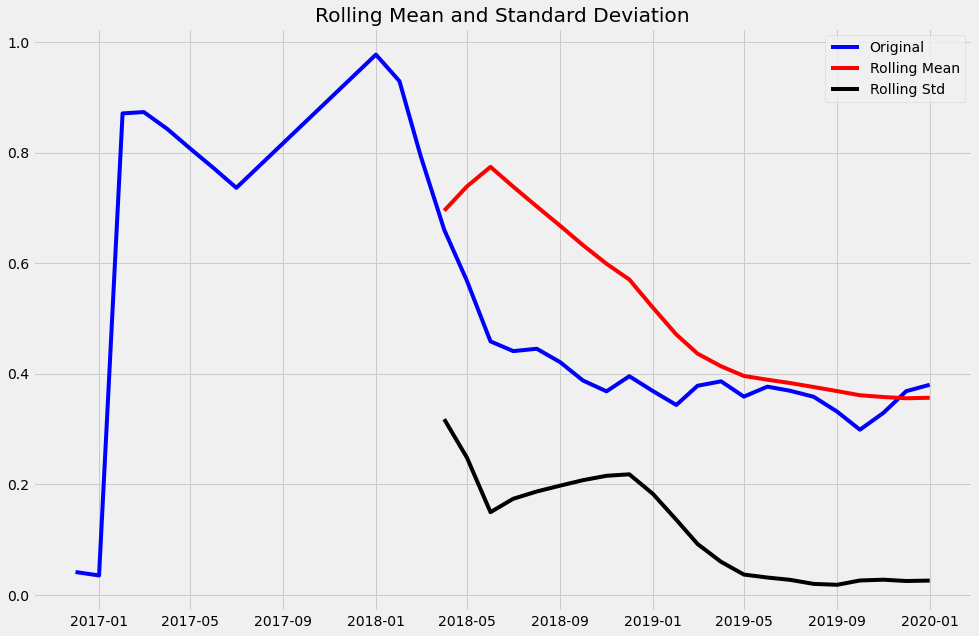

Results of dickey fuller test
Test Statistics                -2.476026
p-value                         0.121417
No. of lags used                0.000000
Number of observations used    32.000000
critical value (1%)            -3.653520
critical value (5%)            -2.957219
critical value (10%)           -2.617588
dtype: float64


In [ ]:
test_stationarity(dataset_log_moving_avg_diff)